# Traffic relation with bank holidays

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)

# Firstview

In [4]:
df = pd.read_csv('/Users/rajathadri_as/Documents/MKPtraffic.csv')

In [5]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [6]:
bank_holidays = pd.read_json(path_or_buf = 'https://www.gov.uk/bank-holidays.json')

In [7]:
bank_holidays.head()

england-and-wales  \
division                                  england-and-wales   
events    [{'title': 'New Year’s Day', 'date': '2018-01-...   

                                                   scotland  \
division                                           scotland   
events    [{'title': 'New Year’s Day', 'date': '2018-01-...   

                                           northern-ireland  
division                                   northern-ireland  
events    [{'title': 'New Year’s Day', 'date': '2018-01-...

# FAD

## Manipulation

In [8]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [9]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [10]:
df_fad = df[['Date','Friday-Ad GA4']]

In [11]:
df_fad.rename(columns={'Friday-Ad GA4':'traffic'}, inplace=True)

In [12]:
df_fad = df_fad.iloc[1:]

In [13]:
df_fad.head()

Date  traffic
1  2024-05-16  13826.0
2  2024-05-15  13388.0
3  2024-05-14  14415.0
4  2024-05-13  15438.0
5  2024-05-12  12718.0

In [14]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [15]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  527 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [16]:
df_fad.dropna(inplace=True)

In [17]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [18]:
df_fad.shape

(527, 2)

In [19]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [20]:
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [21]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization and Analysis

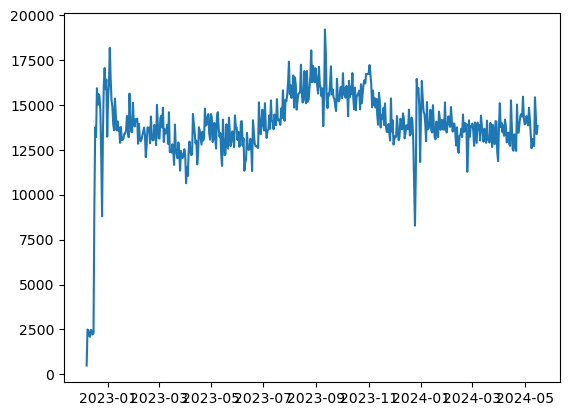

In [22]:
plt.plot(df_fad['Date'], df_fad['traffic'])

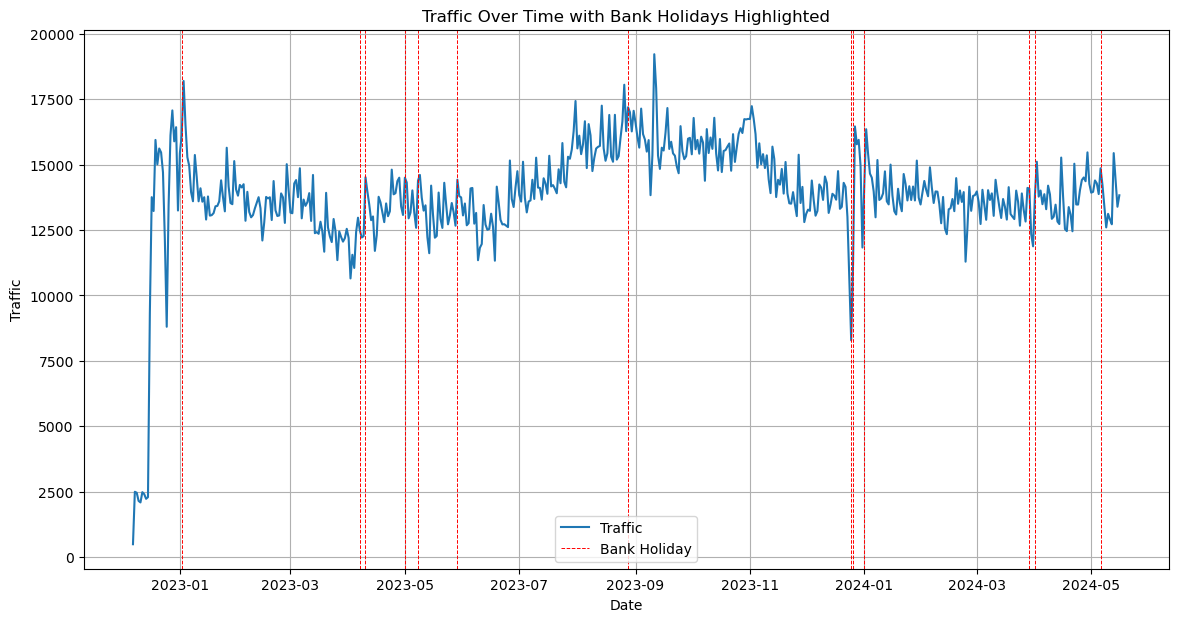

In [23]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


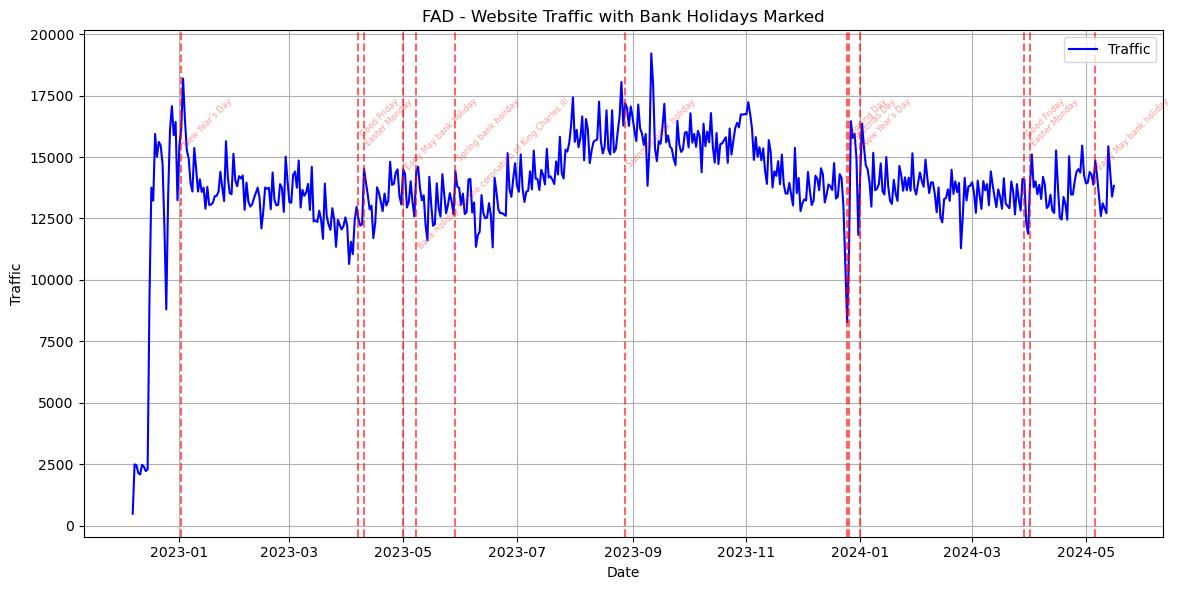

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('FAD - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("FAD",pad_inches=0.3)
# Show the plot
plt.show()

In [25]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [26]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [27]:
non_holiday_traffic.head()

1    13826.0
2    13388.0
3    14415.0
4    15438.0
5    12718.0
Name: traffic, dtype: float64

In [28]:
average_traffic

13887.243190661478

In [29]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.9):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [30]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2023-01-02                                     New Year’s Day          1
1  2023-04-07                                        Good Friday          3
2  2023-04-10                                      Easter Monday          4
3  2023-05-01                             Early May bank holiday          1
4  2023-05-08  Bank holiday for the coronation of King Charle...          1
5  2023-05-29                                Spring bank holiday          1
6  2023-08-28                                Summer bank holiday          1
7  2023-12-25                                      Christmas Day          3
8  2023-12-26                                         Boxing Day          3
9  2024-01-01                                     New Year’s Day          2
10 2024-03-29                                        Good Friday          3
11 2024-04-01                                      Easter Monday          3
12 2024-05-0

# HM

## Manipulation

In [31]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [32]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [33]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [34]:
df_fad = df[['Date','Horsemart - GA4 - GTM']]

In [35]:
df_fad.rename(columns={'Horsemart - GA4 - GTM':'traffic'}, inplace=True)

In [36]:
df_fad = df_fad.iloc[1:]

In [37]:
df_fad.head()

Date  traffic
1  2024-05-16   6526.0
2  2024-05-15   6754.0
3  2024-05-14   7364.0
4  2024-05-13   7060.0
5  2024-05-12   7492.0

In [38]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [39]:
df_fad.shape

(774, 2)

In [40]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  712 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [41]:
df_fad.dropna(inplace=True)

In [42]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [43]:
df_fad.shape

(712, 2)

In [44]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [45]:
start_date = '2022-06-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
36                     True  
37                     True  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [46]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

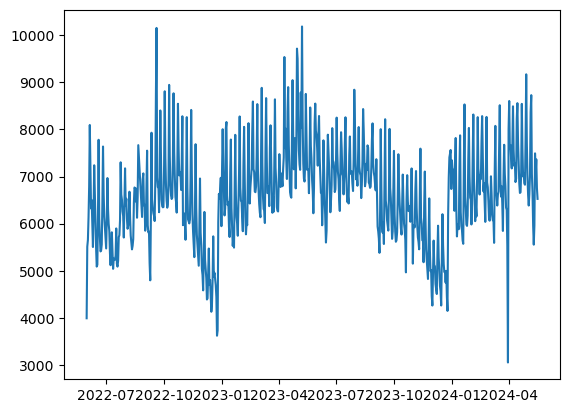

In [47]:
plt.plot(df_fad['Date'], df_fad['traffic'])

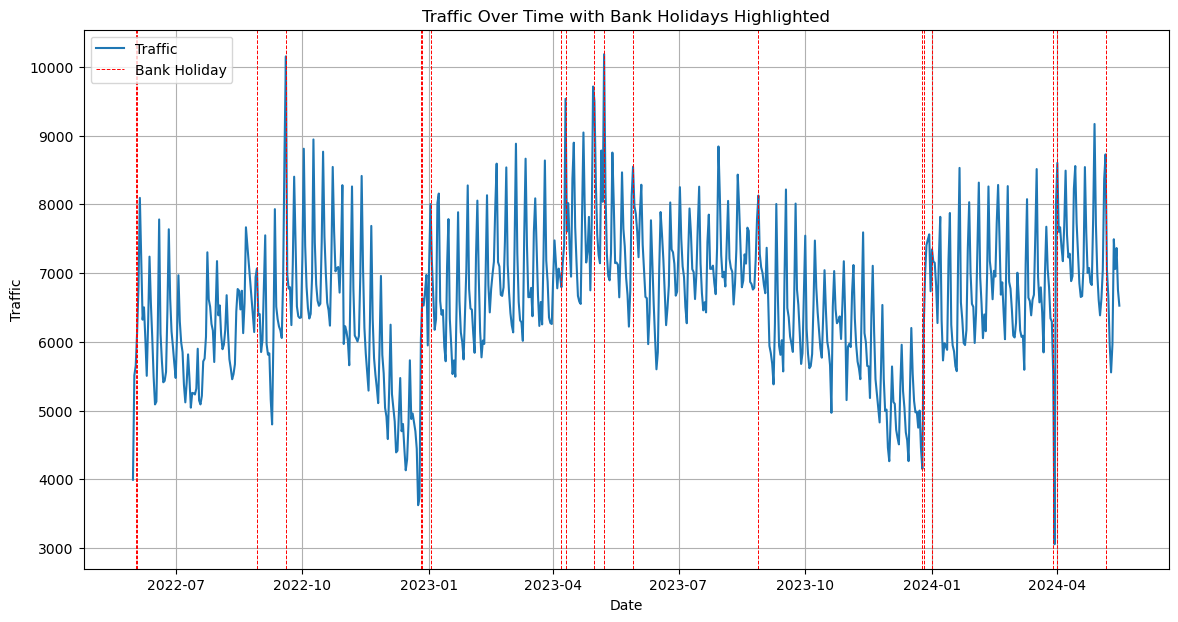

In [48]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


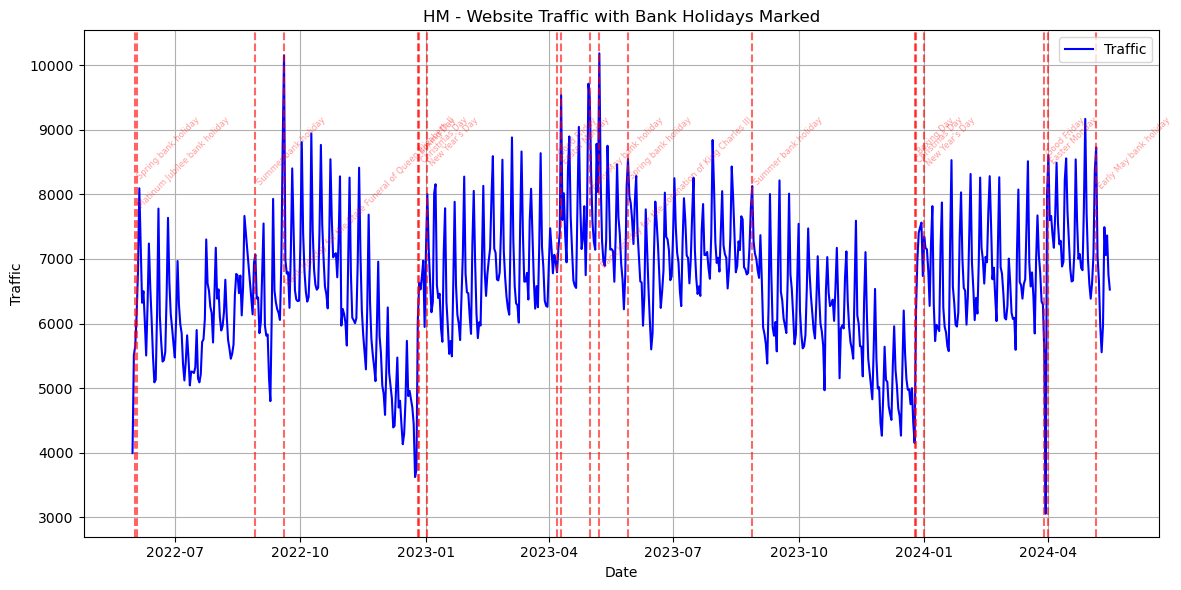

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('HM - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("HM",pad_inches=0.3)

# Show the plot
plt.show()

In [50]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [51]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [52]:
non_holiday_traffic.head()

1    6526.0
2    6754.0
3    7364.0
4    7060.0
5    7492.0
Name: traffic, dtype: float64

In [53]:
average_traffic

6603.50937950938

In [54]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.8):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [55]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-06-02                                Spring bank holiday          1
1  2022-06-03                      Platinum Jubilee bank holiday          1
2  2022-08-29                                Summer bank holiday          1
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...          1
4  2022-12-26                                         Boxing Day          8
5  2022-12-27                                      Christmas Day          1
6  2023-01-02                                     New Year’s Day          1
7  2023-04-07                                        Good Friday          1
8  2023-04-10                                      Easter Monday          1
9  2023-05-01                             Early May bank holiday          1
10 2023-05-08  Bank holiday for the coronation of King Charle...          1
11 2023-05-29                                Spring bank holiday          1
12 2023-08-2

In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [63]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [64]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-06-02                                Spring bank holiday           1
1  2022-06-03                      Platinum Jubilee bank holiday           1
2  2022-08-29                                Summer bank holiday           1
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...           2
4  2022-12-26                                         Boxing Day           1
5  2022-12-27                                      Christmas Day           1
6  2023-01-02                                     New Year’s Day           1
7  2023-04-07                                        Good Friday           1
8  2023-04-10                                      Easter Monday           1
9  2023-05-01                             Early May bank holiday           3
10 2023-05-08  Bank holiday for the coronation of King Charle...           4
11 2023-05-29                                Spring bank holiday           3

# CFS

## Manipulation

In [65]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [66]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [67]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [68]:
df_fad = df[['Date','Caravansforsale - GA4 - GTM']]

In [69]:
df_fad.rename(columns={'Caravansforsale - GA4 - GTM':'traffic'}, inplace=True)

In [70]:
df_fad = df_fad.iloc[1:]

In [71]:
df_fad

Date  traffic
1    2024-05-16   3242.0
2    2024-05-15   3173.0
3    2024-05-14   3512.0
4    2024-05-13   3440.0
5    2024-05-12   3768.0
6    2024-05-11   2795.0
7    2024-05-10   2670.0
8    2024-05-09   2714.0
9    2024-05-08   3067.0
10   2024-05-07   3440.0
11   2024-05-06   4643.0
12   2024-05-05   4179.0
13   2024-05-04   3372.0
14   2024-05-03   3169.0
15   2024-05-02   2720.0
16   2024-05-01   2533.0
17   2024-04-30   3270.0
18   2024-04-29   3744.0
19   2024-04-28   4290.0
20   2024-04-27   3759.0
21   2024-04-26   2969.0
22   2024-04-25   2881.0
23   2024-04-24   3087.0
24   2024-04-23   2717.0
25   2024-04-22   3756.0
26   2024-04-21   4011.0
27   2024-04-20   3517.0
28   2024-04-19   2957.0
29   2024-04-18   3331.0
30   2024-04-17   2936.0
31   2024-04-16   3590.0
32   2024-04-15   4091.0
33   2024-04-14   4027.0
34   2024-04-13   3761.0
35   2024-04-12   3057.0
36   2024-04-11   3336.0
37   2024-04-10   3763.0
38   2024-04-09   3772.0
39   2024-04-08   4311.0
40   2024-04-07   5016.0
41   2024-04-06   4452.0
42   2024-04-05   2902.0
43   2024-04-04   3670.0
44   2024-04-03   4216.0
45   2024-04-02   4287.0
46   2024-04-01   5587.0
47   2024-03-31   4458.0
48   2024-03-30   3558.0
49   2024-03-29   3201.0
50   2024-03-28   3464.0
51   2024-03-27   3370.0
52   2024-03-26   3558.0
53   2024-03-25   4066.0
54   2024-03-24   4232.0
55   2024-03-23   3884.0
56   2024-03-22   3082.0
57   2024-03-21   3169.0
58   2024-03-20   3379.0
59   2024-03-19   3244.0
60   2024-03-18   3472.0
61   2024-03-17   4398.0
62   2024-03-16   3381.0
63   2024-03-15   2990.0
64   2024-03-14   2975.0
65   2024-03-13   2916.0
66   2024-03-12   2793.0
67   2024-03-11   3207.0
68   2024-03-10   3490.0
69   2024-03-09   3067.0
70   2024-03-08   2504.0
71   2024-03-07   2430.0
72   2024-03-06   2087.0
73   2024-03-05   2577.0
74   2024-03-04   3048.0
75   2024-03-03   3439.0
76   2024-03-02   2825.0
77   2024-03-01   2676.0
78   2024-02-29   2663.0
79   2024-02-28   2748.0
80   2024-02-27   2891.0
81   2024-02-26   2926.0
82   2024-02-25   3509.0
83   2024-02-24   3185.0
84   2024-02-23   2737.0
85   2024-02-22   1857.0
86   2024-02-21   3011.0
87   2024-02-20   3032.0
88   2024-02-19   3357.0
89   2024-02-18   4140.0
90   2024-02-17   3547.0
91   2024-02-16   3025.0
92   2024-02-15   2793.0
93   2024-02-14   2689.0
94   2024-02-13   3046.0
95   2024-02-12   3023.0
96   2024-02-11   3478.0
97   2024-02-10   2157.0
98   2024-02-09   2597.0
99   2024-02-08   2655.0
100  2024-02-07   2525.0
101  2024-02-06   2928.0
102  2024-02-05   2942.0
103  2024-02-04   3529.0
104  2024-02-03   2988.0
105  2024-02-02   2617.0
106  2024-02-01   2390.0
107  2024-01-31   2696.0
108  2024-01-30   2824.0
109  2024-01-29   2857.0
110  2024-01-28   3309.0
111  2024-01-27   2771.0
112  2024-01-26   2216.0
113  2024-01-25   2358.0
114  2024-01-24   2354.0
115  2024-01-23   2600.0
116  2024-01-22   2714.0
117  2024-01-21   2171.0
118  2024-01-20   2745.0
119  2024-01-19   2169.0
120  2024-01-18   2241.0
121  2024-01-17   2061.0
122  2024-01-16   2166.0
123  2024-01-15   2499.0
124  2024-01-14   2835.0
125  2024-01-13   2470.0
126  2024-01-12   2156.0
127  2024-01-11   2268.0
128  2024-01-10   2321.0
129  2024-01-09   2307.0
130  2024-01-08   2205.0
131  2024-01-07   2815.0
132  2024-01-06   2502.0
133  2024-01-05   1861.0
134  2024-01-04   2279.0
135  2024-01-03   2387.0
136  2024-01-02   2245.0
137  2024-01-01   2252.0
138  2023-12-31   1927.0
139  2023-12-30   2140.0
140  2023-12-29   2019.0
141  2023-12-28   1895.0
142  2023-12-27   1783.0
143  2023-12-26   1353.0
144  2023-12-25    839.0
145  2023-12-24    963.0
146  2023-12-23   1123.0
147  2023-12-22   1119.0
148  2023-12-21    843.0
149  2023-12-20   1293.0
150  2023-12-19   1323.0
151  2023-12-18   1415.0
152  2023-12-17   1517.0
153  2023-12-16   1312.0
154  2023-12-15   1332.0
155  2023-12-14   1213.0
156  2023-12-13   1398.0
157  2023-12-12   1410.0
158  2023-12-11   1475.0
159  2023-12-10   1626.0
160  2023-1

In [72]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [73]:
df_fad.shape

(774, 2)

In [74]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  712 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [75]:
df_fad.dropna(inplace=True)

In [76]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [77]:
df_fad.shape

(712, 2)

In [78]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [79]:
start_date = '2022-06-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
36                     True  
37                     True  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [80]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

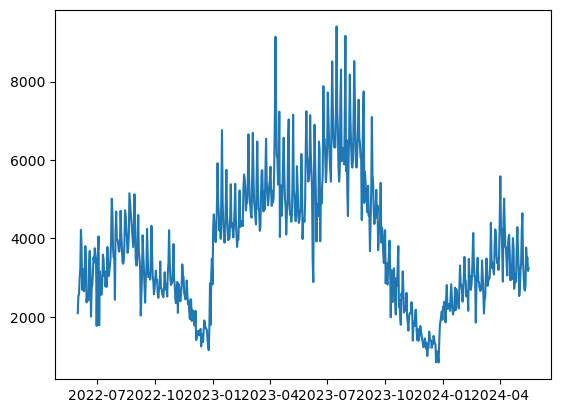

In [81]:
plt.plot(df_fad['Date'], df_fad['traffic'])

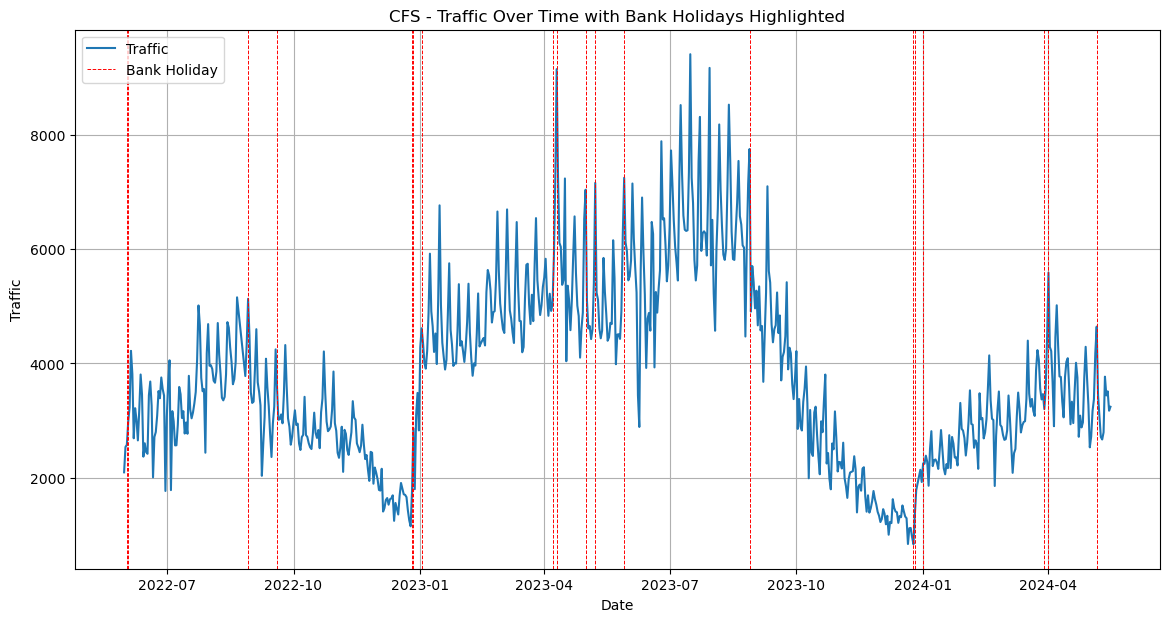

In [82]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('CFS - Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


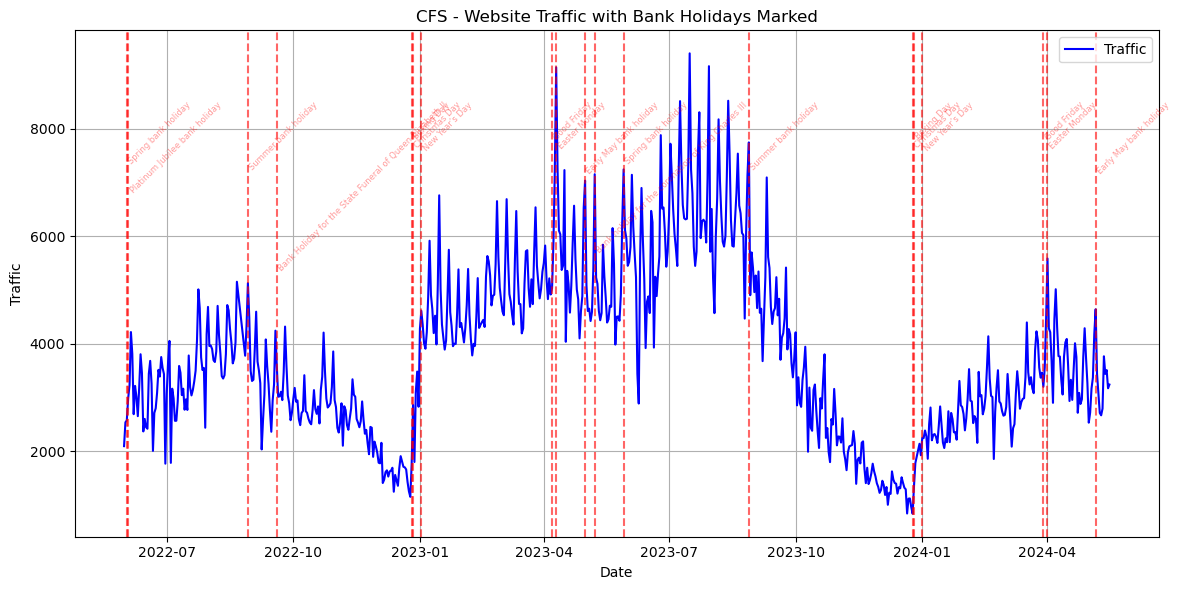

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('CFS - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("CFS",pad_inches=0.3)

# Show the plot
plt.show()

In [84]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [85]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [86]:
non_holiday_traffic.head()

1    3242.0
2    3173.0
3    3512.0
4    3440.0
5    3768.0
Name: traffic, dtype: float64

In [87]:
average_traffic

3791.051948051948

In [88]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.9):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [89]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-06-02                                Spring bank holiday          5
1  2022-06-03                      Platinum Jubilee bank holiday          5
2  2022-08-29                                Summer bank holiday          1
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...          5
4  2022-12-26                                         Boxing Day         60
5  2022-12-27                                      Christmas Day         60
6  2023-01-02                                     New Year’s Day          1
7  2023-04-07                                        Good Friday          1
8  2023-04-10                                      Easter Monday          1
9  2023-05-01                             Early May bank holiday          1
10 2023-05-08  Bank holiday for the coronation of King Charle...          1
11 2023-05-29                                Spring bank holiday          1
12 2023-08-2

In [90]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [91]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [92]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-06-02                                Spring bank holiday           1
1  2022-06-03                      Platinum Jubilee bank holiday           1
2  2022-08-29                                Summer bank holiday           1
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...           1
4  2022-12-26                                         Boxing Day           1
5  2022-12-27                                      Christmas Day           1
6  2023-01-02                                     New Year’s Day           1
7  2023-04-07                                        Good Friday          30
8  2023-04-10                                      Easter Monday          30
9  2023-05-01                             Early May bank holiday           7
10 2023-05-08  Bank holiday for the coronation of King Charle...           6
11 2023-05-29                                Spring bank holiday          12

# GS

## Manipulation

In [93]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [94]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [95]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [96]:
df_fad = df[['Date','Gunstar.co.uk GA4 - GTM']]

In [97]:
df_fad.rename(columns={'Gunstar.co.uk GA4 - GTM':'traffic'}, inplace=True)

In [98]:
df_fad = df_fad.iloc[1:]

In [99]:
df_fad

Date  traffic
1    2024-05-16   6655.0
2    2024-05-15   6287.0
3    2024-05-14   6712.0
4    2024-05-13   6592.0
5    2024-05-12   6719.0
6    2024-05-11   5926.0
7    2024-05-10   5868.0
8    2024-05-09   5904.0
9    2024-05-08   6450.0
10   2024-05-07   6698.0
11   2024-05-06   6677.0
12   2024-05-05   6669.0
13   2024-05-04   6075.0
14   2024-05-03   6022.0
15   2024-05-02   5807.0
16   2024-05-01   5793.0
17   2024-04-30   5896.0
18   2024-04-29   6092.0
19   2024-04-28   7093.0
20   2024-04-27   6659.0
21   2024-04-26   6029.0
22   2024-04-25   5966.0
23   2024-04-24   5958.0
24   2024-04-23   5711.0
25   2024-04-22   6342.0
26   2024-04-21   6349.0
27   2024-04-20   6163.0
28   2024-04-19   5915.0
29   2024-04-18   5745.0
30   2024-04-17   5771.0
31   2024-04-16   6142.0
32   2024-04-15   6416.0
33   2024-04-14   6549.0
34   2024-04-13   6214.0
35   2024-04-12   5831.0
36   2024-04-11   6098.0
37   2024-04-10   6233.0
38   2024-04-09   6526.0
39   2024-04-08   6225.0
40   2024-04-07   6933.0
41   2024-04-06   6726.0
42   2024-04-05   6179.0
43   2024-04-04   6208.0
44   2024-04-03   6461.0
45   2024-04-02   6032.0
46   2024-04-01   6856.0
47   2024-03-31   6611.0
48   2024-03-30   5244.0
49   2024-03-29   6761.0
50   2024-03-28   6156.0
51   2024-03-27   6106.0
52   2024-03-26   5905.0
53   2024-03-25   6465.0
54   2024-03-24   6686.0
55   2024-03-23   6751.0
56   2024-03-22   5844.0
57   2024-03-21   5903.0
58   2024-03-20   6338.0
59   2024-03-19   6200.0
60   2024-03-18   6567.0
61   2024-03-17   7184.0
62   2024-03-16   6576.0
63   2024-03-15   6170.0
64   2024-03-14   6310.0
65   2024-03-13   6347.0
66   2024-03-12   6284.0
67   2024-03-11   5654.0
68   2024-03-10   6081.0
69   2024-03-09   5524.0
70   2024-03-08   5766.0
71   2024-03-07   6040.0
72   2024-03-06   5857.0
73   2024-03-05   6195.0
74   2024-03-04   6188.0
75   2024-03-03   6819.0
76   2024-03-02   6741.0
77   2024-03-01   5977.0
78   2024-02-29   5868.0
79   2024-02-28   6306.0
80   2024-02-27   6043.0
81   2024-02-26   6614.0
82   2024-02-25   7425.0
83   2024-02-24   6644.0
84   2024-02-23   6199.0
85   2024-02-22   6152.0
86   2024-02-21   6499.0
87   2024-02-20   6117.0
88   2024-02-19   6256.0
89   2024-02-18   7134.0
90   2024-02-17   6735.0
91   2024-02-16   6153.0
92   2024-02-15   6133.0
93   2024-02-14   6161.0
94   2024-02-13   6332.0
95   2024-02-12   5079.0
96   2024-02-11      NaN
97   2024-02-10      NaN
98   2024-02-09      NaN
99   2024-02-08      NaN
100  2024-02-07      NaN
101  2024-02-06      1.0
102  2024-02-05      NaN
103  2024-02-04      NaN
104  2024-02-03      NaN
105  2024-02-02      NaN
106  2024-02-01      NaN
107  2024-01-31      NaN
108  2024-01-30      1.0
109  2024-01-29      NaN
110  2024-01-28      NaN
111  2024-01-27      NaN
112  2024-01-26      3.0
113  2024-01-25      1.0
114  2024-01-24      NaN
115  2024-01-23      1.0
116  2024-01-22      3.0
117  2024-01-21      2.0
118  2024-01-20      NaN
119  2024-01-19      2.0
120  2024-01-18      1.0
121  2024-01-17      1.0
122  2024-01-16      4.0
123  2024-01-15      7.0
124  2024-01-14     10.0
125  2024-01-13     10.0
126  2024-01-12   1782.0
127  2024-01-11   6355.0
128  2024-01-10   6360.0
129  2024-01-09   5808.0
130  2024-01-08   6761.0
131  2024-01-07   7879.0
132  2024-01-06   7301.0
133  2024-01-05   6663.0
134  2024-01-04   6872.0
135  2024-01-03   6644.0
136  2024-01-02   6989.0
137  2024-01-01   7132.0
138  2023-12-31   6858.0
139  2023-12-30   7424.0
140  2023-12-29   7225.0
141  2023-12-28   7647.0
142  2023-12-27   6796.0
143  2023-12-26   6810.0
144  2023-12-25   5225.0
145  2023-12-24   6239.0
146  2023-12-23   5811.0
147  2023-12-22   5739.0
148  2023-12-21   6360.0
149  2023-12-20   6174.0
150  2023-12-19   6388.0
151  2023-12-18   6518.0
152  2023-12-17   7268.0
153  2023-12-16   6655.0
154  2023-12-15   5934.0
155  2023-12-14   6213.0
156  2023-12-13   6036.0
157  2023-12-12   6403.0
158  2023-12-11   6178.0
159  2023-12-10   7077.0
160  2023-1

In [100]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [101]:
df_fad.shape

(774, 2)

In [102]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  732 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [103]:
df_fad.dropna(inplace=True)

In [104]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [105]:
df_fad.shape

(732, 2)

In [106]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [107]:
start_date = '2022-05-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
35                     True  
36                     True  
37                     True  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [108]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

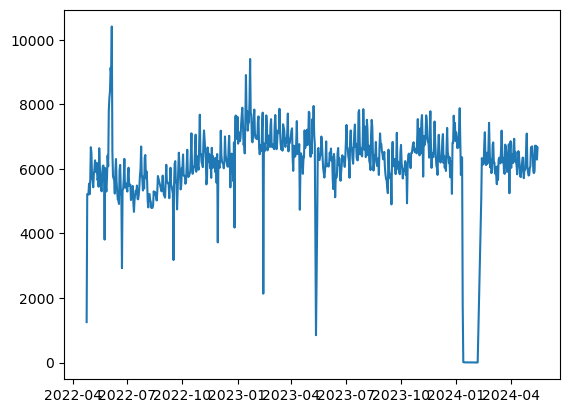

In [109]:
plt.plot(df_fad['Date'], df_fad['traffic'])

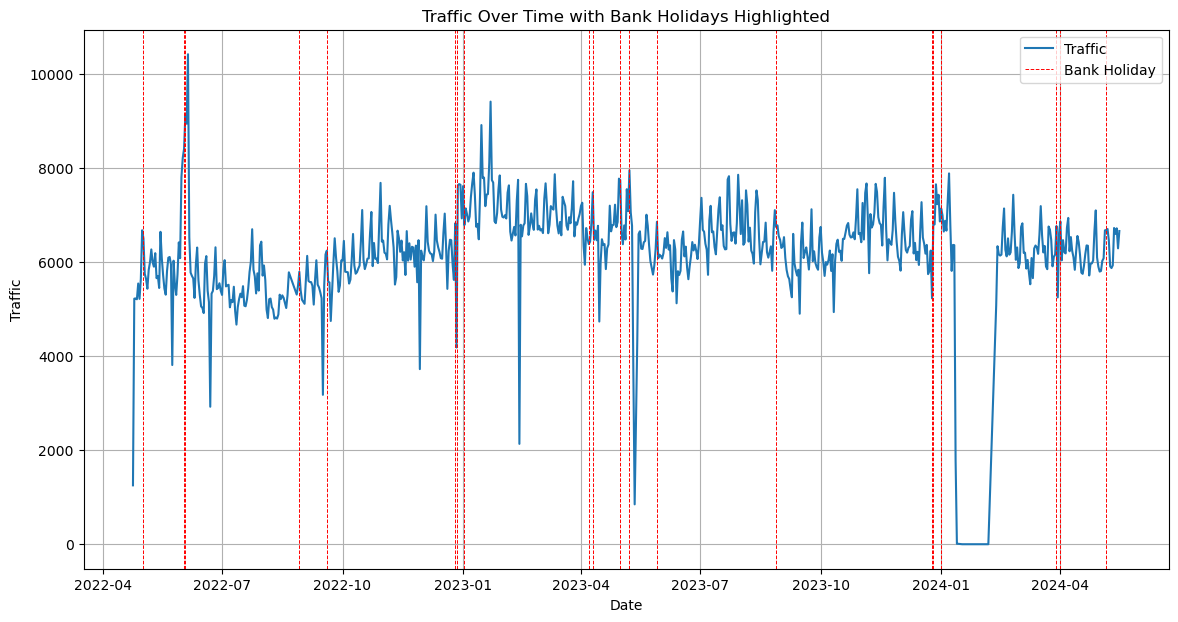

In [110]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


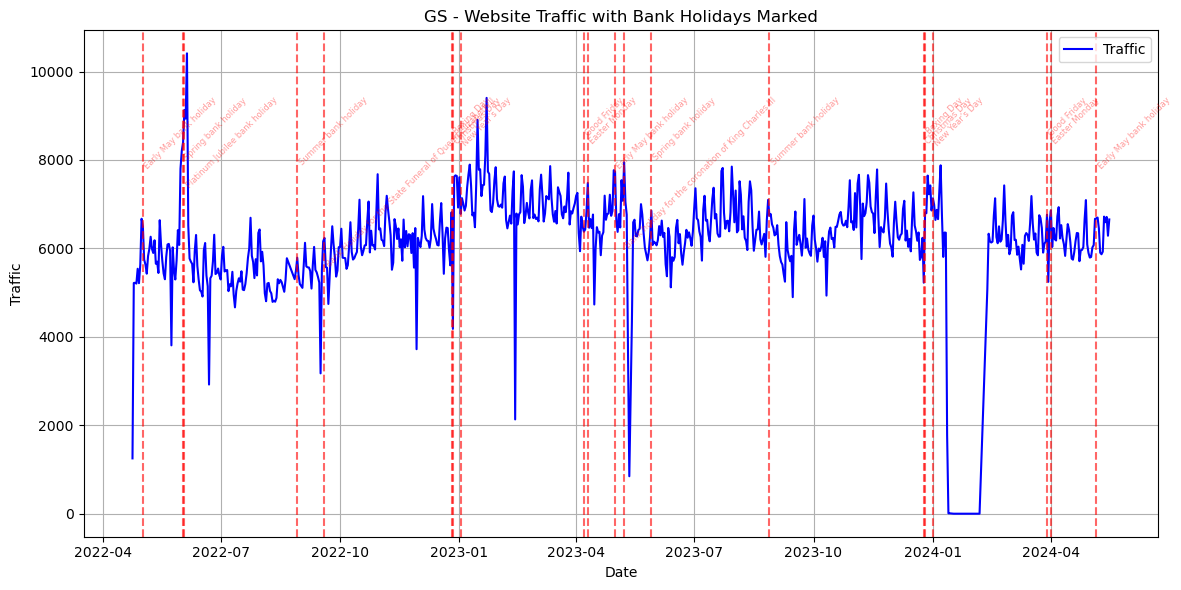

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('GS - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("GS",pad_inches=0.3)

# Show the plot
plt.show()

In [112]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [113]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [114]:
non_holiday_traffic.head()

1    6655.0
2    6287.0
3    6712.0
4    6592.0
5    6719.0
Name: traffic, dtype: float64

In [115]:
average_traffic

6156.153089887641

In [116]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.9):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [117]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-05-02                             Early May bank holiday          1
1  2022-06-02                                Spring bank holiday          1
2  2022-06-03                      Platinum Jubilee bank holiday          1
3  2022-08-29                                Summer bank holiday          7
4  2022-09-19  Bank Holiday for the State Funeral of Queen El...          1
5  2022-12-26                                         Boxing Day          2
6  2022-12-27                                      Christmas Day          1
7  2023-01-02                                     New Year’s Day          1
8  2023-04-07                                        Good Friday          1
9  2023-04-10                                      Easter Monday          1
10 2023-05-01                             Early May bank holiday          1
11 2023-05-08  Bank holiday for the coronation of King Charle...          1
12 2023-05-2

In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [118]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [119]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-05-02                             Early May bank holiday           1
1  2022-06-02                                Spring bank holiday           6
2  2022-06-03                      Platinum Jubilee bank holiday           6
3  2022-08-29                                Summer bank holiday           1
4  2022-09-19  Bank Holiday for the State Funeral of Queen El...           1
5  2022-12-26                                         Boxing Day           1
6  2022-12-27                                      Christmas Day           4
7  2023-01-02                                     New Year’s Day           2
8  2023-04-07                                        Good Friday           1
9  2023-04-10                                      Easter Monday           1
10 2023-05-01                             Early May bank holiday           2
11 2023-05-08  Bank holiday for the coronation of King Charle...           1

# HC

## Manipulation

In [120]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [121]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [122]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [123]:
df_fad = df[['Date','Horseclicks - GA4 - GTM']]

In [124]:
df_fad.rename(columns={'Horseclicks - GA4 - GTM':'traffic'}, inplace=True)

In [125]:
df_fad = df_fad.iloc[1:]

In [126]:
df_fad

Date  traffic
1    2024-05-16    968.0
2    2024-05-15   2706.0
3    2024-05-14   3013.0
4    2024-05-13   3059.0
5    2024-05-12   2944.0
6    2024-05-11   2665.0
7    2024-05-10   2631.0
8    2024-05-09   2738.0
9    2024-05-08   2765.0
10   2024-05-07   2855.0
11   2024-05-06   3074.0
12   2024-05-05   3492.0
13   2024-05-04   3335.0
14   2024-05-03   2853.0
15   2024-05-02   2944.0
16   2024-05-01   2853.0
17   2024-04-30   2990.0
18   2024-04-29   3211.0
19   2024-04-28   3548.0
20   2024-04-27   3255.0
21   2024-04-26   2984.0
22   2024-04-25   2944.0
23   2024-04-24   2967.0
24   2024-04-23   3059.0
25   2024-04-22   3162.0
26   2024-04-21   3560.0
27   2024-04-20   3233.0
28   2024-04-19   2975.0
29   2024-04-18   3096.0
30   2024-04-17   2835.0
31   2024-04-16   3116.0
32   2024-04-15   3188.0
33   2024-04-14   3567.0
34   2024-04-13   3149.0
35   2024-04-12   3163.0
36   2024-04-11   3293.0
37   2024-04-10   3343.0
38   2024-04-09   3386.0
39   2024-04-08   3514.0
40   2024-04-07   3959.0
41   2024-04-06   3647.0
42   2024-04-05   3482.0
43   2024-04-04   3335.0
44   2024-04-03   3385.0
45   2024-04-02   3524.0
46   2024-04-01   3564.0
47   2024-03-31   3668.0
48   2024-03-30   3503.0
49   2024-03-29   3393.0
50   2024-03-28   3365.0
51   2024-03-27   3404.0
52   2024-03-26   3507.0
53   2024-03-25   3666.0
54   2024-03-24   3926.0
55   2024-03-23   3705.0
56   2024-03-22   3317.0
57   2024-03-21   3431.0
58   2024-03-20   3474.0
59   2024-03-19   3494.0
60   2024-03-18   3680.0
61   2024-03-17   4006.0
62   2024-03-16   3681.0
63   2024-03-15   3487.0
64   2024-03-14   3332.0
65   2024-03-13   3256.0
66   2024-03-12   3479.0
67   2024-03-11   3588.0
68   2024-03-10   3822.0
69   2024-03-09   3831.0
70   2024-03-08   3186.0
71   2024-03-07   3250.0
72   2024-03-06   3343.0
73   2024-03-05   3607.0
74   2024-03-04   3529.0
75   2024-03-03   3849.0
76   2024-03-02   3723.0
77   2024-03-01   3331.0
78   2024-02-29   3101.0
79   2024-02-28   3478.0
80   2024-02-27   3479.0
81   2024-02-26   3709.0
82   2024-02-25   3947.0
83   2024-02-24   3672.0
84   2024-02-23   3356.0
85   2024-02-22   3204.0
86   2024-02-21   3313.0
87   2024-02-20   3473.0
88   2024-02-19   3580.0
89   2024-02-18   3883.0
90   2024-02-17   3537.0
91   2024-02-16   3068.0
92   2024-02-15   3067.0
93   2024-02-14   3065.0
94   2024-02-13   3275.0
95   2024-02-12   3495.0
96   2024-02-11   3587.0
97   2024-02-10   3716.0
98   2024-02-09   3409.0
99   2024-02-08   3015.0
100  2024-02-07   3155.0
101  2024-02-06   3053.0
102  2024-02-05   3403.0
103  2024-02-04   3627.0
104  2024-02-03   3475.0
105  2024-02-02   3344.0
106  2024-02-01   3183.0
107  2024-01-31   3166.0
108  2024-01-30   3152.0
109  2024-01-29   3389.0
110  2024-01-28   3733.0
111  2024-01-27   3455.0
112  2024-01-26   2904.0
113  2024-01-25   3091.0
114  2024-01-24   3009.0
115  2024-01-23   3147.0
116  2024-01-22   3017.0
117  2024-01-21   3514.0
118  2024-01-20   3385.0
119  2024-01-19   2850.0
120  2024-01-18   2769.0
121  2024-01-17   2806.0
122  2024-01-16   2906.0
123  2024-01-15   3074.0
124  2024-01-14   3250.0
125  2024-01-13   3050.0
126  2024-01-12   2773.0
127  2024-01-11   2649.0
128  2024-01-10   2643.0
129  2024-01-09   2877.0
130  2024-01-08   3120.0
131  2024-01-07   3541.0
132  2024-01-06   3483.0
133  2024-01-05   3095.0
134  2024-01-04   3048.0
135  2024-01-03   3222.0
136  2024-01-02   3551.0
137  2024-01-01   3696.0
138  2023-12-31   3374.0
139  2023-12-30   3448.0
140  2023-12-29   3176.0
141  2023-12-28   3336.0
142  2023-12-27   3242.0
143  2023-12-26   2992.0
144  2023-12-25   2529.0
145  2023-12-24   2478.0
146  2023-12-23   2765.0
147  2023-12-22   2766.0
148  2023-12-21   2698.0
149  2023-12-20   2750.0
150  2023-12-19   2855.0
151  2023-12-18   2855.0
152  2023-12-17   3206.0
153  2023-12-16   3059.0
154  2023-12-15   2658.0
155  2023-12-14   2823.0
156  2023-12-13   2814.0
157  2023-12-12   2873.0
158  2023-12-11   3032.0
159  2023-12-10   3459.0
160  2023-1

In [127]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [128]:
df_fad.shape

(774, 2)

In [129]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  712 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [130]:
df_fad.dropna(inplace=True)

In [131]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [132]:
df_fad.shape

(712, 2)

In [133]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [134]:
start_date = '2022-06-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
36                     True  
37                     True  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [135]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

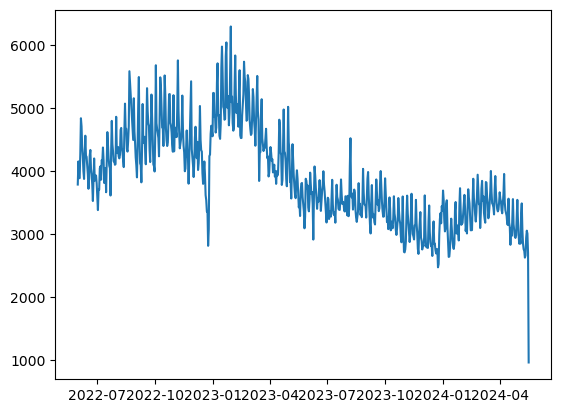

In [136]:
plt.plot(df_fad['Date'], df_fad['traffic'])

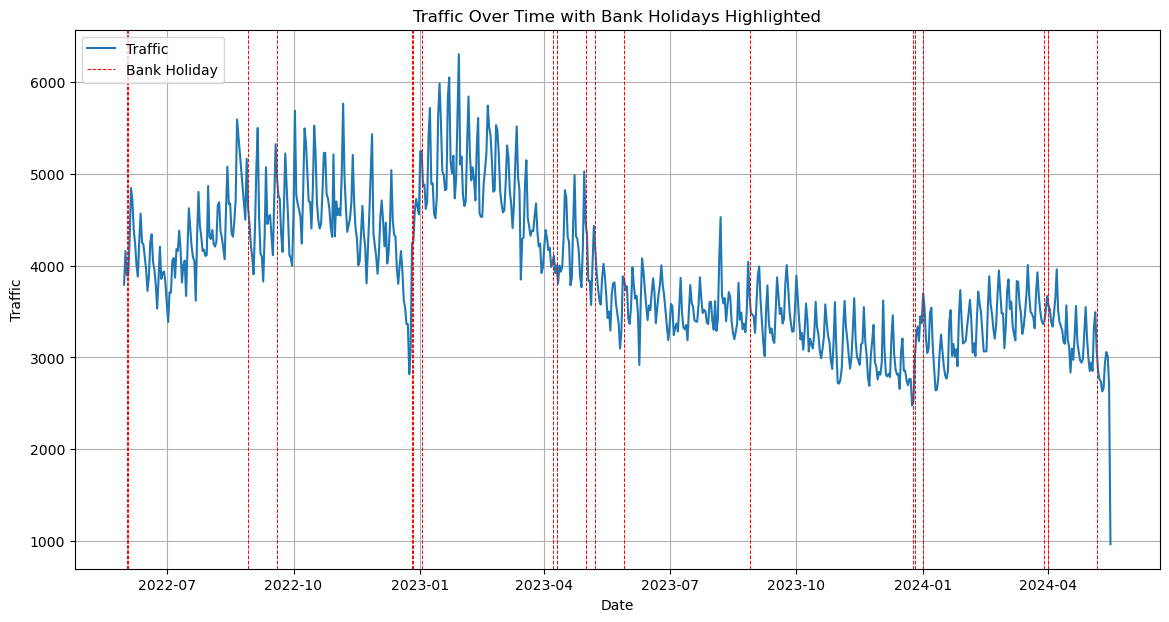

In [137]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


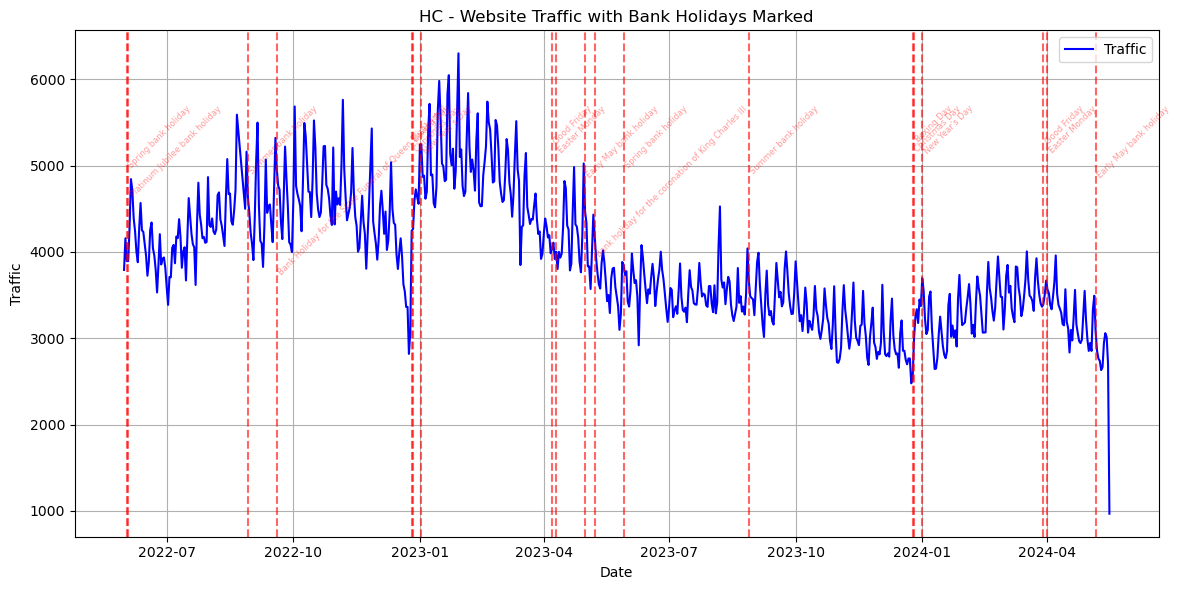

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('HC - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("HC",pad_inches=0.3)

# Show the plot
plt.show()

In [139]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [140]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [141]:
non_holiday_traffic.head()

1     968.0
2    2706.0
3    3013.0
4    3059.0
5    2944.0
Name: traffic, dtype: float64

In [142]:
average_traffic

3893.8297258297257

In [143]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.7):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [144]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-06-02                                Spring bank holiday          1
1  2022-06-03                      Platinum Jubilee bank holiday          1
2  2022-08-29                                Summer bank holiday          1
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...          1
4  2022-12-26                                         Boxing Day          1
5  2022-12-27                                      Christmas Day          1
6  2023-01-02                                     New Year’s Day          1
7  2023-04-07                                        Good Friday          1
8  2023-04-10                                      Easter Monday          1
9  2023-05-01                             Early May bank holiday          1
10 2023-05-08  Bank holiday for the coronation of King Charle...          1
11 2023-05-29                                Spring bank holiday          1
12 2023-08-2

In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [145]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [146]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-06-02                                Spring bank holiday           1
1  2022-06-03                      Platinum Jubilee bank holiday           1
2  2022-08-29                                Summer bank holiday           2
3  2022-09-19  Bank Holiday for the State Funeral of Queen El...           5
4  2022-12-26                                         Boxing Day           1
5  2022-12-27                                      Christmas Day           1
6  2023-01-02                                     New Year’s Day           4
7  2023-04-07                                        Good Friday           1
8  2023-04-10                                      Easter Monday           1
9  2023-05-01                             Early May bank holiday           2
10 2023-05-08  Bank holiday for the coronation of King Charle...           1
11 2023-05-29                                Spring bank holiday           1

# FA

## Manipulation

In [147]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [148]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [149]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [150]:
df_fad = df[['Date','FarmingAds GA4 - GTM']]

In [151]:
df_fad.rename(columns={'FarmingAds GA4 - GTM':'traffic'}, inplace=True)

In [152]:
df_fad = df_fad.iloc[1:]

In [153]:
df_fad

Date  traffic
1    2024-05-16   1207.0
2    2024-05-15   1216.0
3    2024-05-14   1310.0
4    2024-05-13   1415.0
5    2024-05-12   1643.0
6    2024-05-11   1418.0
7    2024-05-10   1342.0
8    2024-05-09   1077.0
9    2024-05-08   1235.0
10   2024-05-07   1357.0
11   2024-05-06   1917.0
12   2024-05-05   2136.0
13   2024-05-04   1809.0
14   2024-05-03   1535.0
15   2024-05-02   1162.0
16   2024-05-01   1206.0
17   2024-04-30   1175.0
18   2024-04-29   1221.0
19   2024-04-28   1517.0
20   2024-04-27   1404.0
21   2024-04-26   1151.0
22   2024-04-25   1292.0
23   2024-04-24   1128.0
24   2024-04-23   1243.0
25   2024-04-22   1327.0
26   2024-04-21   1512.0
27   2024-04-20   1321.0
28   2024-04-19   1236.0
29   2024-04-18   1184.0
30   2024-04-17   1214.0
31   2024-04-16   1212.0
32   2024-04-15   1295.0
33   2024-04-14   1598.0
34   2024-04-13   1362.0
35   2024-04-12   1226.0
36   2024-04-11   1187.0
37   2024-04-10   1160.0
38   2024-04-09   1285.0
39   2024-04-08   1396.0
40   2024-04-07   1534.0
41   2024-04-06   1356.0
42   2024-04-05   1282.0
43   2024-04-04   1284.0
44   2024-04-03   1229.0
45   2024-04-02   1280.0
46   2024-04-01   1495.0
47   2024-03-31   1524.0
48   2024-03-30   1250.0
49   2024-03-29   1372.0
50   2024-03-28   1154.0
51   2024-03-27   1169.0
52   2024-03-26   1221.0
53   2024-03-25   1251.0
54   2024-03-24   1471.0
55   2024-03-23   1277.0
56   2024-03-22   1236.0
57   2024-03-21   1130.0
58   2024-03-20   1178.0
59   2024-03-19   1180.0
60   2024-03-18   1243.0
61   2024-03-17   1437.0
62   2024-03-16   1300.0
63   2024-03-15   1096.0
64   2024-03-14   1079.0
65   2024-03-13   1077.0
66   2024-03-12   1105.0
67   2024-03-11   1120.0
68   2024-03-10   1376.0
69   2024-03-09   1099.0
70   2024-03-08    943.0
71   2024-03-07    998.0
72   2024-03-06    951.0
73   2024-03-05    953.0
74   2024-03-04   1041.0
75   2024-03-03   1167.0
76   2024-03-02   1119.0
77   2024-03-01    948.0
78   2024-02-29   1035.0
79   2024-02-28   1039.0
80   2024-02-27   1045.0
81   2024-02-26   1012.0
82   2024-02-25   1274.0
83   2024-02-24   1044.0
84   2024-02-23    912.0
85   2024-02-22   1044.0
86   2024-02-21   1016.0
87   2024-02-20    914.0
88   2024-02-19    911.0
89   2024-02-18   1055.0
90   2024-02-17    939.0
91   2024-02-16    848.0
92   2024-02-15    899.0
93   2024-02-14    864.0
94   2024-02-13    882.0
95   2024-02-12    912.0
96   2024-02-11   1157.0
97   2024-02-10    903.0
98   2024-02-09    827.0
99   2024-02-08    850.0
100  2024-02-07    843.0
101  2024-02-06    873.0
102  2024-02-05    856.0
103  2024-02-04   1100.0
104  2024-02-03    848.0
105  2024-02-02    777.0
106  2024-02-01    817.0
107  2024-01-31    779.0
108  2024-01-30    838.0
109  2024-01-29    873.0
110  2024-01-28   1021.0
111  2024-01-27    855.0
112  2024-01-26    695.0
113  2024-01-25    787.0
114  2024-01-24    747.0
115  2024-01-23    768.0
116  2024-01-22    803.0
117  2024-01-21    951.0
118  2024-01-20    820.0
119  2024-01-19    717.0
120  2024-01-18    632.0
121  2024-01-17    624.0
122  2024-01-16    624.0
123  2024-01-15    653.0
124  2024-01-14    811.0
125  2024-01-13    712.0
126  2024-01-12    631.0
127  2024-01-11    654.0
128  2024-01-10    644.0
129  2024-01-09    630.0
130  2024-01-08    644.0
131  2024-01-07    811.0
132  2024-01-06    702.0
133  2024-01-05    668.0
134  2024-01-04    642.0
135  2024-01-03    637.0
136  2024-01-02    594.0
137  2024-01-01    601.0
138  2023-12-31    542.0
139  2023-12-30    659.0
140  2023-12-29    600.0
141  2023-12-28    678.0
142  2023-12-27    503.0
143  2023-12-26    402.0
144  2023-12-25    463.0
145  2023-12-24    577.0
146  2023-12-23    493.0
147  2023-12-22    464.0
148  2023-12-21    489.0
149  2023-12-20    499.0
150  2023-12-19    510.0
151  2023-12-18    556.0
152  2023-12-17    607.0
153  2023-12-16    588.0
154  2023-12-15    496.0
155  2023-12-14    506.0
156  2023-12-13    580.0
157  2023-12-12    633.0
158  2023-12-11    603.0
159  2023-12-10    613.0
160  2023-1

In [154]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [155]:
df_fad.shape

(774, 2)

In [156]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  712 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [157]:
df_fad.dropna(inplace=True)

In [158]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [159]:
df_fad.shape

(712, 2)

In [160]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [161]:
start_date = '2022-07-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [162]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

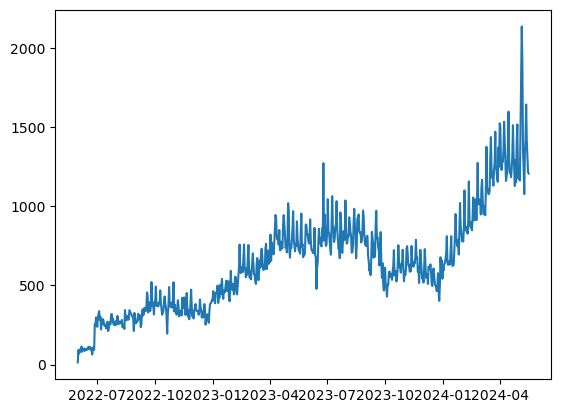

In [163]:
plt.plot(df_fad['Date'], df_fad['traffic'])

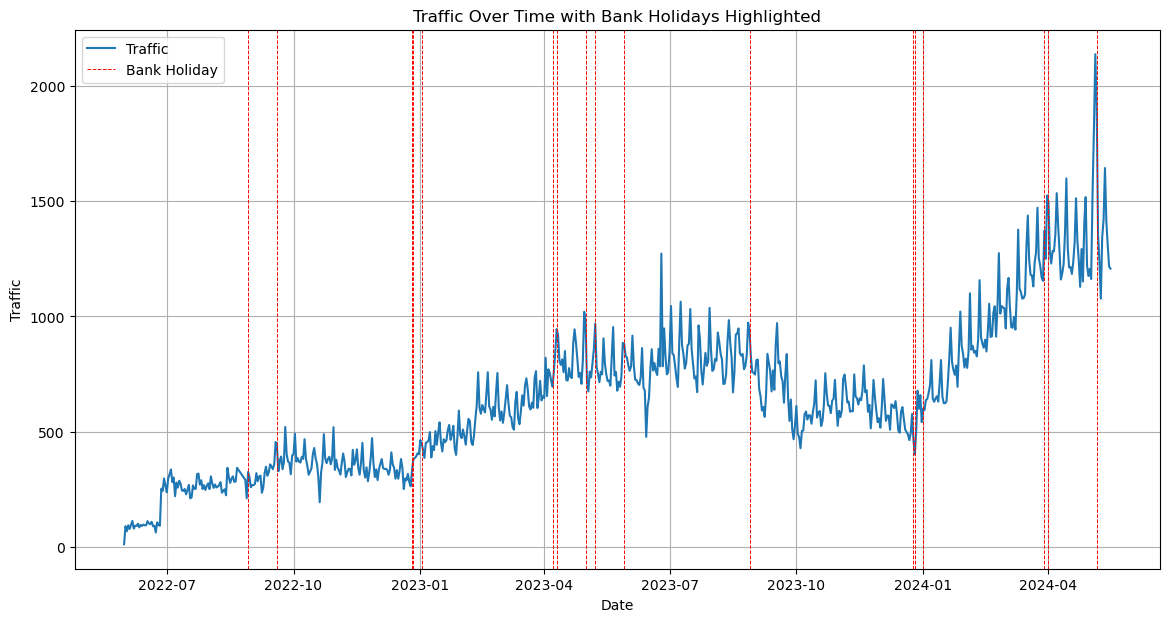

In [164]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


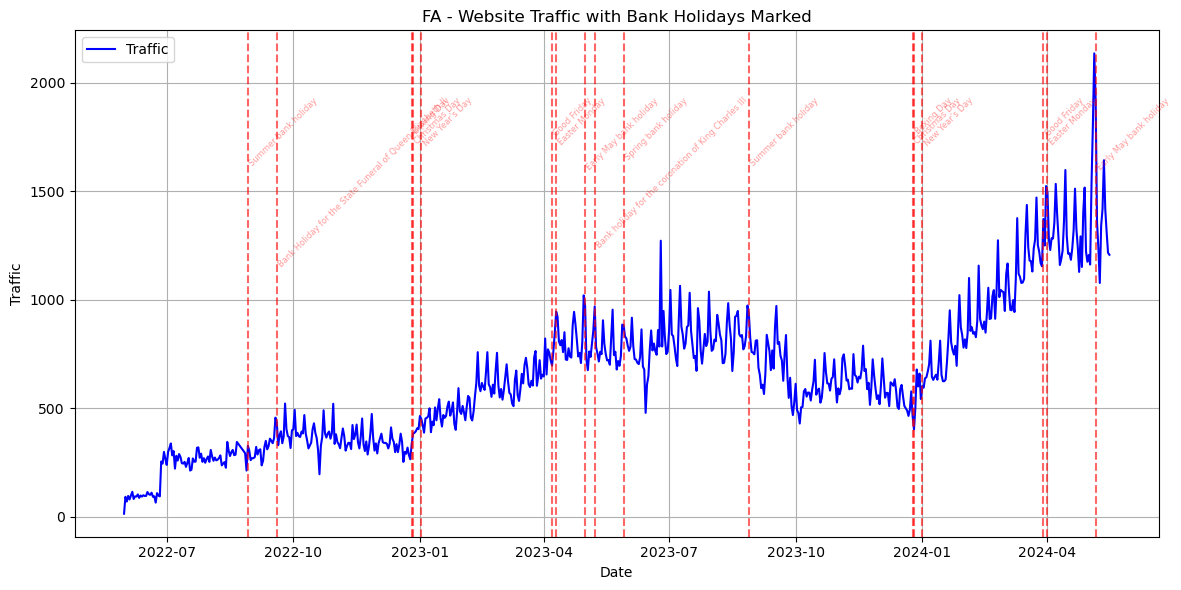

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('FA - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("FA",pad_inches=0.3)

# Show the plot
plt.show()

In [166]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [167]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [168]:
non_holiday_traffic.head()

1    1207.0
2    1216.0
3    1310.0
4    1415.0
5    1643.0
Name: traffic, dtype: float64

In [169]:
average_traffic

642.2820143884892

In [170]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.7):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [171]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-08-29                                Summer bank holiday         22
1  2022-09-19  Bank Holiday for the State Funeral of Queen El...          6
2  2022-12-26                                         Boxing Day         34
3  2022-12-27                                      Christmas Day         34
4  2023-01-02                                     New Year’s Day          3
5  2023-04-07                                        Good Friday          1
6  2023-04-10                                      Easter Monday          1
7  2023-05-01                             Early May bank holiday          1
8  2023-05-08  Bank holiday for the coronation of King Charle...          1
9  2023-05-29                                Spring bank holiday          1
10 2023-08-28                                Summer bank holiday          1
11 2023-12-25                                      Christmas Day          2
12 2023-12-2

In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [172]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [173]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-08-29                                Summer bank holiday           1
1  2022-09-19  Bank Holiday for the State Funeral of Queen El...           1
2  2022-12-26                                         Boxing Day           1
3  2022-12-27                                      Christmas Day           1
4  2023-01-02                                     New Year’s Day           1
5  2023-04-07                                        Good Friday           1
6  2023-04-10                                      Easter Monday           6
7  2023-05-01                             Early May bank holiday           3
8  2023-05-08  Bank holiday for the coronation of King Charle...           4
9  2023-05-29                                Spring bank holiday           5
10 2023-08-28                                Summer bank holiday          12
11 2023-12-25                                      Christmas Day           1

# VDC

## Manipulation

In [174]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [175]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [176]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [177]:
df_fad = df[['Date','Ventadecaballos.es - GA4']]

In [178]:
df_fad.rename(columns={'Ventadecaballos.es - GA4':'traffic'}, inplace=True)

In [179]:
df_fad = df_fad.iloc[1:]

In [180]:
df_fad

Date  traffic
1    2024-05-16    578.0
2    2024-05-15    955.0
3    2024-05-14   1034.0
4    2024-05-13   1011.0
5    2024-05-12   1122.0
6    2024-05-11    879.0
7    2024-05-10    772.0
8    2024-05-09    868.0
9    2024-05-08    874.0
10   2024-05-07    888.0
11   2024-05-06    966.0
12   2024-05-05   1107.0
13   2024-05-04    855.0
14   2024-05-03    805.0
15   2024-05-02    914.0
16   2024-05-01   1118.0
17   2024-04-30    881.0
18   2024-04-29   1034.0
19   2024-04-28   1147.0
20   2024-04-27    964.0
21   2024-04-26    783.0
22   2024-04-25    801.0
23   2024-04-24    909.0
24   2024-04-23   1022.0
25   2024-04-22   1100.0
26   2024-04-21   1243.0
27   2024-04-20   1049.0
28   2024-04-19    868.0
29   2024-04-18    949.0
30   2024-04-17    968.0
31   2024-04-16    979.0
32   2024-04-15   1093.0
33   2024-04-14   1265.0
34   2024-04-13    845.0
35   2024-04-12    792.0
36   2024-04-11    870.0
37   2024-04-10    860.0
38   2024-04-09    973.0
39   2024-04-08   1227.0
40   2024-04-07   1254.0
41   2024-04-06    940.0
42   2024-04-05    847.0
43   2024-04-04    889.0
44   2024-04-03    918.0
45   2024-04-02    964.0
46   2024-04-01   1096.0
47   2024-03-31   1291.0
48   2024-03-30    807.0
49   2024-03-29   1179.0
50   2024-03-28   1084.0
51   2024-03-27    974.0
52   2024-03-26   1080.0
53   2024-03-25   1202.0
54   2024-03-24   1218.0
55   2024-03-23    895.0
56   2024-03-22    753.0
57   2024-03-21    914.0
58   2024-03-20    927.0
59   2024-03-19    970.0
60   2024-03-18   1005.0
61   2024-03-17   1150.0
62   2024-03-16    870.0
63   2024-03-15    803.0
64   2024-03-14    873.0
65   2024-03-13    870.0
66   2024-03-12    856.0
67   2024-03-11    988.0
68   2024-03-10   1226.0
69   2024-03-09   1075.0
70   2024-03-08    895.0
71   2024-03-07   1002.0
72   2024-03-06    877.0
73   2024-03-05    859.0
74   2024-03-04   1033.0
75   2024-03-03   1235.0
76   2024-03-02   1072.0
77   2024-03-01    771.0
78   2024-02-29    851.0
79   2024-02-28    927.0
80   2024-02-27    936.0
81   2024-02-26   1047.0
82   2024-02-25   1310.0
83   2024-02-24    780.0
84   2024-02-23    917.0
85   2024-02-22    965.0
86   2024-02-21    908.0
87   2024-02-20    950.0
88   2024-02-19   1004.0
89   2024-02-18   1156.0
90   2024-02-17    922.0
91   2024-02-16    797.0
92   2024-02-15    962.0
93   2024-02-14    859.0
94   2024-02-13   1004.0
95   2024-02-12   1032.0
96   2024-02-11   1212.0
97   2024-02-10    936.0
98   2024-02-09    874.0
99   2024-02-08    946.0
100  2024-02-07    884.0
101  2024-02-06    908.0
102  2024-02-05    968.0
103  2024-02-04   1181.0
104  2024-02-03    908.0
105  2024-02-02    846.0
106  2024-02-01    858.0
107  2024-01-31   1000.0
108  2024-01-30   1047.0
109  2024-01-29   1108.0
110  2024-01-28   1300.0
111  2024-01-27    916.0
112  2024-01-26    822.0
113  2024-01-25    896.0
114  2024-01-24    908.0
115  2024-01-23    943.0
116  2024-01-22   1051.0
117  2024-01-21   1189.0
118  2024-01-20    863.0
119  2024-01-19    883.0
120  2024-01-18    933.0
121  2024-01-17    990.0
122  2024-01-16   1027.0
123  2024-01-15   1073.0
124  2024-01-14   1178.0
125  2024-01-13    980.0
126  2024-01-12    769.0
127  2024-01-11    790.0
128  2024-01-10    837.0
129  2024-01-09    715.0
130  2024-01-08    937.0
131  2024-01-07   1032.0
132  2024-01-06    990.0
133  2024-01-05    824.0
134  2024-01-04    887.0
135  2024-01-03    861.0
136  2024-01-02    981.0
137  2024-01-01    966.0
138  2023-12-31    752.0
139  2023-12-30    934.0
140  2023-12-29    844.0
141  2023-12-28    922.0
142  2023-12-27    931.0
143  2023-12-26    881.0
144  2023-12-25    919.0
145  2023-12-24    686.0
146  2023-12-23    729.0
147  2023-12-22    644.0
148  2023-12-21    704.0
149  2023-12-20    789.0
150  2023-12-19    870.0
151  2023-12-18    933.0
152  2023-12-17    973.0
153  2023-12-16    743.0
154  2023-12-15    717.0
155  2023-12-14    816.0
156  2023-12-13    847.0
157  2023-12-12    866.0
158  2023-12-11    902.0
159  2023-12-10   1165.0
160  2023-1

In [181]:
df_fad.tail()

Date  traffic
770  2022-04-08   1035.0
771  2022-04-07   1037.0
772  2022-04-06   1070.0
773  2022-04-05   1331.0
774  2022-04-04    989.0

In [182]:
df_fad.shape

(774, 2)

In [183]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  774 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [184]:
df_fad.dropna(inplace=True)

In [185]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [186]:
df_fad.shape

(774, 2)

In [187]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [188]:
start_date = '2022-04-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date  \
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   

             notes  bunting  
33                    False  
34                     True  
35                     True  
36                     True  
37                     True  
38                     True  
39                    False  
40                     True  
41  Substitute day     True  
42  Substitute day     True  
43                    False  
44                     True  
45                     True  
46                     True  
47                     True  
48                     True  
49                     True  
50                     True  
51                     True  
52                    False  
53                     True  
54                     True

In [189]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

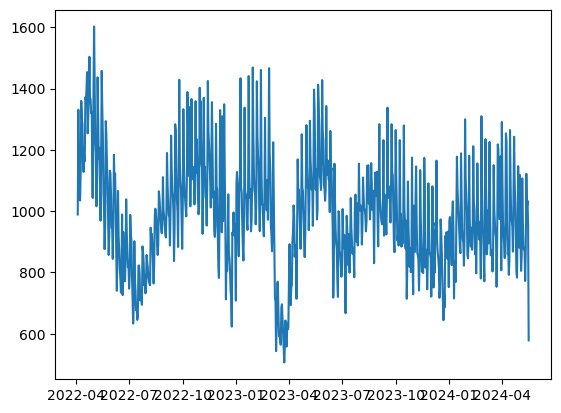

In [190]:
plt.plot(df_fad['Date'], df_fad['traffic'])

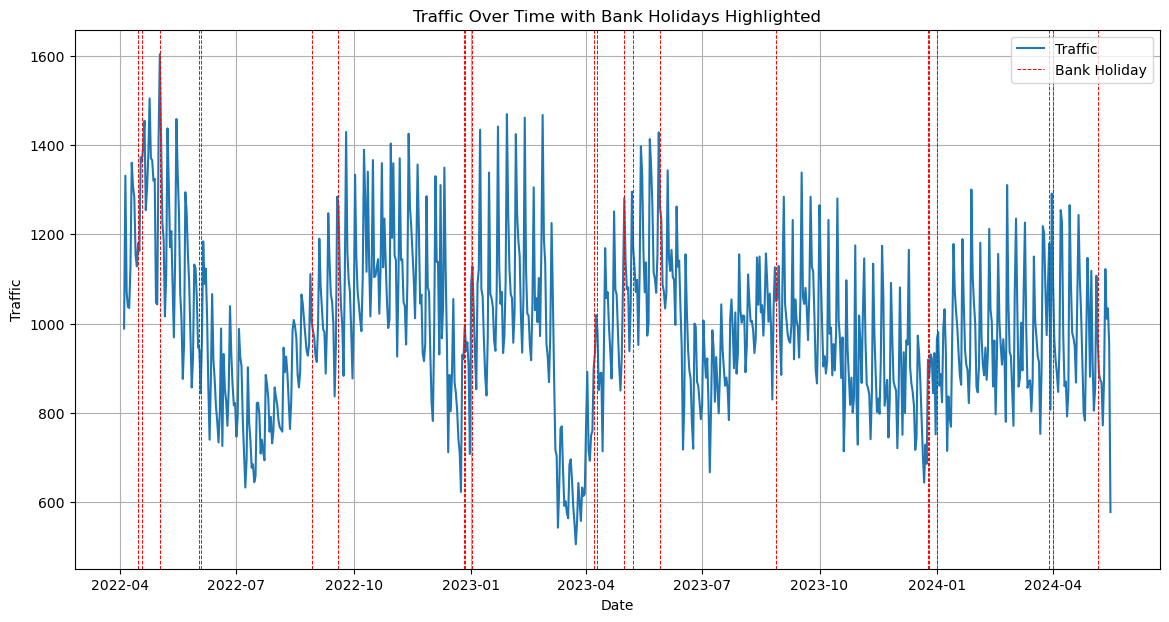

In [191]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


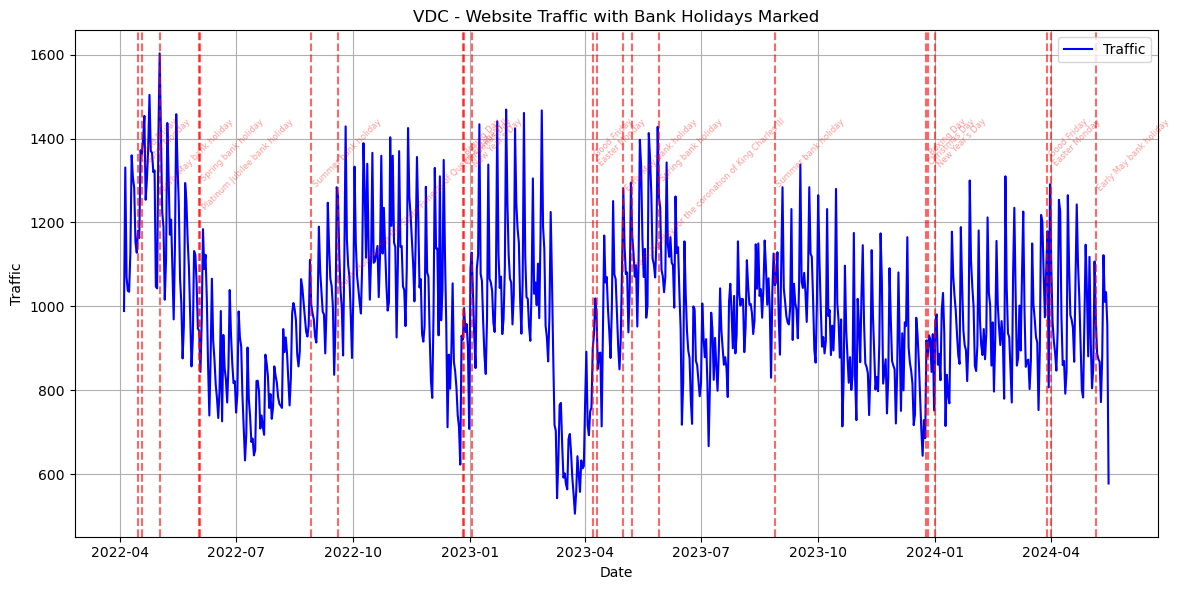

In [192]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('VDC - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("VDC",pad_inches=0.3)

# Show the plot
plt.show()

In [193]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [194]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [195]:
non_holiday_traffic.head()

1     578.0
2     955.0
3    1034.0
4    1011.0
5    1122.0
Name: traffic, dtype: float64

In [196]:
average_traffic

988.2726063829788

In [197]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.7):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [198]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2022-04-15                                        Good Friday          1
1  2022-04-18                                      Easter Monday          1
2  2022-05-02                             Early May bank holiday          1
3  2022-06-02                                Spring bank holiday          1
4  2022-06-03                      Platinum Jubilee bank holiday          1
5  2022-08-29                                Summer bank holiday          1
6  2022-09-19  Bank Holiday for the State Funeral of Queen El...          1
7  2022-12-26                                         Boxing Day          1
8  2022-12-27                                      Christmas Day          1
9  2023-01-02                                     New Year’s Day          1
10 2023-04-07                                        Good Friday          1
11 2023-04-10                                      Easter Monday          1
12 2023-05-0

In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [199]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [200]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2022-04-15                                        Good Friday           1
1  2022-04-18                                      Easter Monday          12
2  2022-05-02                             Early May bank holiday           5
3  2022-06-02                                Spring bank holiday           1
4  2022-06-03                      Platinum Jubilee bank holiday           1
5  2022-08-29                                Summer bank holiday           1
6  2022-09-19  Bank Holiday for the State Funeral of Queen El...           2
7  2022-12-26                                         Boxing Day           1
8  2022-12-27                                      Christmas Day           1
9  2023-01-02                                     New Year’s Day           1
10 2023-04-07                                        Good Friday           1
11 2023-04-10                                      Easter Monday           1

# WB

## Manipulation

In [201]:
def get_england_and_wales(data_frame):
    return (
        pd
        .json_normalize(
            data_frame.to_dict(),
            record_path=[['england-and-wales', 'events']]
        )
        .astype({
            'title': 'string',
            'date': 'datetime64[ns]',
            'notes': 'string',
            'bunting': 'bool'
        })
    )

In [202]:
bh = get_england_and_wales(bank_holidays)
bh

title       date  \
0                                      New Year’s Day 2018-01-01   
1                                         Good Friday 2018-03-30   
2                                       Easter Monday 2018-04-02   
3                              Early May bank holiday 2018-05-07   
4                                 Spring bank holiday 2018-05-28   
5                                 Summer bank holiday 2018-08-27   
6                                       Christmas Day 2018-12-25   
7                                          Boxing Day 2018-12-26   
8                                      New Year’s Day 2019-01-01   
9                                         Good Friday 2019-04-19   
10                                      Easter Monday 2019-04-22   
11                             Early May bank holiday 2019-05-06   
12                                Spring bank holiday 2019-05-27   
13                                Summer bank holiday 2019-08-26   
14                                      Christmas Day 2019-12-25   
15                                         Boxing Day 2019-12-26   
16                                     New Year’s Day 2020-01-01   
17                                        Good Friday 2020-04-10   
18                                      Easter Monday 2020-04-13   
19                    Early May bank holiday (VE day) 2020-05-08   
20                                Spring bank holiday 2020-05-25   
21                                Summer bank holiday 2020-08-31   
22                                      Christmas Day 2020-12-25   
23                                         Boxing Day 2020-12-28   
24                                     New Year’s Day 2021-01-01   
25                                        Good Friday 2021-04-02   
26                                      Easter Monday 2021-04-05   
27                             Early May bank holiday 2021-05-03   
28                                Spring bank holiday 2021-05-31   
29                                Summer bank holiday 2021-08-30   
30                                      Christmas Day 2021-12-27   
31                                         Boxing Day 2021-12-28   
32                                     New Year’s Day 2022-01-03   
33                                        Good Friday 2022-04-15   
34                                      Easter Monday 2022-04-18   
35                             Early May bank holiday 2022-05-02   
36                                Spring bank holiday 2022-06-02   
37                      Platinum Jubilee bank holiday 2022-06-03   
38                                Summer bank holiday 2022-08-29   
39  Bank Holiday for the State Funeral of Queen El... 2022-09-19   
40                                         Boxing Day 2022-12-26   
41                                      Christmas Day 2022-12-27   
42                                     New Year’s Day 2023-01-02   
43                                        Good Friday 2023-04-07   
44                                      Easter Monday 2023-04-10   
45                             Early May bank holiday 2023-05-01   
46  Bank holiday for the coronation of King Charle... 2023-05-08   
47                                Spring bank holiday 2023-05-29   
48                                Summer bank holiday 2023-08-28   
49                                      Christmas Day 2023-12-25   
50                                         Boxing Day 2023-12-26   
51                                     New Year’s Day 2024-01-01   
52                                        Good Friday 2024-03-29   
53                                      Easter Monday 2024-04-01   
54                             Early May bank holiday 2024-05-06   
55                                Spring bank holiday 2024-05-27   
56                                Summer bank holiday 2024-08-26   
57                                      Christmas Day 2024-12-25   
58                                  

In [203]:
df.head()

Date  Friday-Ad GA4  Horsemart - GA4 - GTM  Gunstar.co.uk GA4 - GTM  \
0  2024-05-17            NaN                  189.0                    295.0   
1  2024-05-16        13826.0                 6526.0                   6655.0   
2  2024-05-15        13388.0                 6754.0                   6287.0   
3  2024-05-14        14415.0                 7364.0                   6712.0   
4  2024-05-13        15438.0                 7060.0                   6592.0   

   Horseclicks - GA4 - GTM  Caravansforsale - GA4 - GTM  Birdtrader GA4 - GTM  \
0                      NaN                          NaN                 103.0   
1                    968.0                       3242.0                1993.0   
2                   2706.0                       3173.0                1987.0   
3                   3013.0                       3512.0                2094.0   
4                   3059.0                       3440.0                1966.0   

   Wightbay GA4  Ventadecaballos.es - GA4  FarmingAds GA4 - GTM  \
0           NaN                       NaN                  44.0   
1        3176.0                     578.0                1207.0   
2        3372.0                     955.0                1216.0   
3        3977.0                    1034.0                1310.0   
4        3415.0                    1011.0                1415.0   

   DogsandPuppies GA4 - GTM  KittenAds GA4 - GTM  
0                       NaN                  5.0  
1                      77.0                 67.0  
2                      66.0                 54.0  
3                      77.0                 55.0  
4                      67.0                 65.0

In [204]:
df_fad = df[['Date','Wightbay GA4']]

In [205]:
df_fad.rename(columns={'Wightbay GA4':'traffic'}, inplace=True)

In [206]:
df_fad = df_fad.iloc[1:]

In [207]:
df_fad

Date  traffic
1    2024-05-16   3176.0
2    2024-05-15   3372.0
3    2024-05-14   3977.0
4    2024-05-13   3415.0
5    2024-05-12   3337.0
6    2024-05-11   3074.0
7    2024-05-10   3084.0
8    2024-05-09   3190.0
9    2024-05-08   3396.0
10   2024-05-07   3740.0
11   2024-05-06   3801.0
12   2024-05-05   3683.0
13   2024-05-04   3245.0
14   2024-05-03   3381.0
15   2024-05-02   3298.0
16   2024-05-01   3373.0
17   2024-04-30   3274.0
18   2024-04-29   3548.0
19   2024-04-28   3810.0
20   2024-04-27   3595.0
21   2024-04-26   3427.0
22   2024-04-25   3197.0
23   2024-04-24   3442.0
24   2024-04-23   3691.0
25   2024-04-22   3669.0
26   2024-04-21   3596.0
27   2024-04-20   3523.0
28   2024-04-19   3269.0
29   2024-04-18   3283.0
30   2024-04-17   3439.0
31   2024-04-16   3590.0
32   2024-04-15   3484.0
33   2024-04-14   3618.0
34   2024-04-13   3595.0
35   2024-04-12   3324.0
36   2024-04-11   3480.0
37   2024-04-10   3556.0
38   2024-04-09   4021.0
39   2024-04-08   3626.0
40   2024-04-07   3690.0
41   2024-04-06   3634.0
42   2024-04-05   3367.0
43   2024-04-04   3445.0
44   2024-04-03   3500.0
45   2024-04-02   4165.0
46   2024-04-01   3739.0
47   2024-03-31   3358.0
48   2024-03-30   3269.0
49   2024-03-29   3540.0
50   2024-03-28   3446.0
51   2024-03-27   3525.0
52   2024-03-26   3889.0
53   2024-03-25   3531.0
54   2024-03-24   3375.0
55   2024-03-23   3563.0
56   2024-03-22   3364.0
57   2024-03-21   3260.0
58   2024-03-20   3238.0
59   2024-03-19   3881.0
60   2024-03-18   3483.0
61   2024-03-17   3605.0
62   2024-03-16   3409.0
63   2024-03-15   3470.0
64   2024-03-14   3193.0
65   2024-03-13   3306.0
66   2024-03-12   3858.0
67   2024-03-11   3385.0
68   2024-03-10   3425.0
69   2024-03-09   3392.0
70   2024-03-08   3265.0
71   2024-03-07   3274.0
72   2024-03-06   3275.0
73   2024-03-05   3885.0
74   2024-03-04   3444.0
75   2024-03-03   3530.0
76   2024-03-02   3496.0
77   2024-03-01   3204.0
78   2024-02-29   2994.0
79   2024-02-28   3474.0
80   2024-02-27   3101.0
81   2024-02-26   3509.0
82   2024-02-25   3157.0
83   2024-02-24   3329.0
84   2024-02-23   3173.0
85   2024-02-22   3409.0
86   2024-02-21   3564.0
87   2024-02-20   3879.0
88   2024-02-19   3301.0
89   2024-02-18   3610.0
90   2024-02-17   3608.0
91   2024-02-16   3289.0
92   2024-02-15   3264.0
93   2024-02-14   3391.0
94   2024-02-13   3864.0
95   2024-02-12   3118.0
96   2024-02-11   3521.0
97   2024-02-10   3381.0
98   2024-02-09   3173.0
99   2024-02-08   2959.0
100  2024-02-07   3506.0
101  2024-02-06   3805.0
102  2024-02-05   3247.0
103  2024-02-04   3496.0
104  2024-02-03   3383.0
105  2024-02-02   3183.0
106  2024-02-01   3162.0
107  2024-01-31   3310.0
108  2024-01-30   3254.0
109  2024-01-29   3387.0
110  2024-01-28   3421.0
111  2024-01-27   3301.0
112  2024-01-26   3253.0
113  2024-01-25   3317.0
114  2024-01-24   3210.0
115  2024-01-23   3716.0
116  2024-01-22   3237.0
117  2024-01-21   3569.0
118  2024-01-20   3380.0
119  2024-01-19   3086.0
120  2024-01-18   3101.0
121  2024-01-17   3272.0
122  2024-01-16   3475.0
123  2024-01-15   3257.0
124  2024-01-14   3367.0
125  2024-01-13   3222.0
126  2024-01-12   3219.0
127  2024-01-11   3100.0
128  2024-01-10   3093.0
129  2024-01-09   3564.0
130  2024-01-08   2845.0
131  2024-01-07   3070.0
132  2024-01-06   3281.0
133  2024-01-05   3159.0
134  2024-01-04   3174.0
135  2024-01-03   3263.0
136  2024-01-02   3680.0
137  2024-01-01   2784.0
138  2023-12-31   2657.0
139  2023-12-30   3166.0
140  2023-12-29   3140.0
141  2023-12-28   3055.0
142  2023-12-27   2971.0
143  2023-12-26   2551.0
144  2023-12-25   1520.0
145  2023-12-24   1872.0
146  2023-12-23   2309.0
147  2023-12-22   2226.0
148  2023-12-21   2635.0
149  2023-12-20   2572.0
150  2023-12-19   3088.0
151  2023-12-18   2683.0
152  2023-12-17   2859.0
153  2023-12-16   2758.0
154  2023-12-15   2604.0
155  2023-12-14   2761.0
156  2023-12-13   2822.0
157  2023-12-12   3223.0
158  2023-12-11   2776.0
159  2023-12-10   3112.0
160  2023-1

In [208]:
df_fad.tail()

Date  traffic
770  2022-04-08      NaN
771  2022-04-07      NaN
772  2022-04-06      NaN
773  2022-04-05      NaN
774  2022-04-04      NaN

In [209]:
df_fad.shape

(774, 2)

In [210]:
df_fad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 1 to 774
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     774 non-null    object 
 1   traffic  433 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.2+ KB


In [211]:
df_fad.dropna(inplace=True)

In [212]:
df_fad['Date'] = df_fad['Date'].astype('datetime64[ns]')

In [213]:
df_fad.shape

(433, 2)

In [214]:
df_fad.tail()

Date  traffic
429 2023-03-15   3205.0
430 2023-03-14   3653.0
431 2023-03-13   3084.0
432 2023-03-12   3044.0
433 2023-03-11    798.0

In [215]:
bh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    75 non-null     string        
 1   date     75 non-null     datetime64[ns]
 2   notes    75 non-null     string        
 3   bunting  75 non-null     bool          
dtypes: bool(1), datetime64[ns](1), string(2)
memory usage: 2.0 KB


In [216]:
start_date = '2023-04-01'
end_date = datetime.today().strftime('%Y-%m-%d')

start_date = pd.to_datetime(start_date)

bh_fad = bh[(bh['date'] >= start_date) & (bh['date'] <= end_date)]

bh_fad

title       date notes  \
43                                        Good Friday 2023-04-07         
44                                      Easter Monday 2023-04-10         
45                             Early May bank holiday 2023-05-01         
46  Bank holiday for the coronation of King Charle... 2023-05-08         
47                                Spring bank holiday 2023-05-29         
48                                Summer bank holiday 2023-08-28         
49                                      Christmas Day 2023-12-25         
50                                         Boxing Day 2023-12-26         
51                                     New Year’s Day 2024-01-01         
52                                        Good Friday 2024-03-29         
53                                      Easter Monday 2024-04-01         
54                             Early May bank holiday 2024-05-06         

    bunting  
43    False  
44     True  
45     True  
46     True  
47     True  
48     True  
49     True  
50     True  
51     True  
52    False  
53     True  
54     True

In [217]:
bh_fad.reset_index(drop=True, inplace=True)

## Visualization

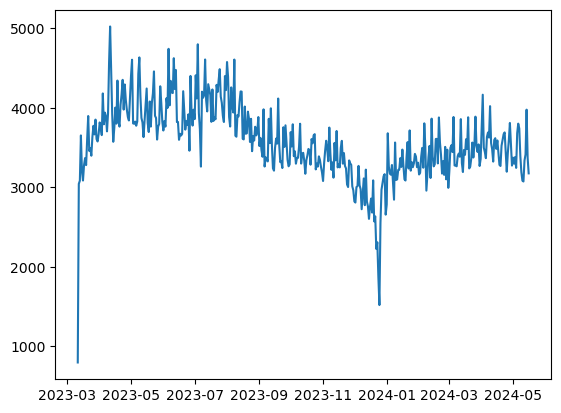

In [218]:
plt.plot(df_fad['Date'], df_fad['traffic'])

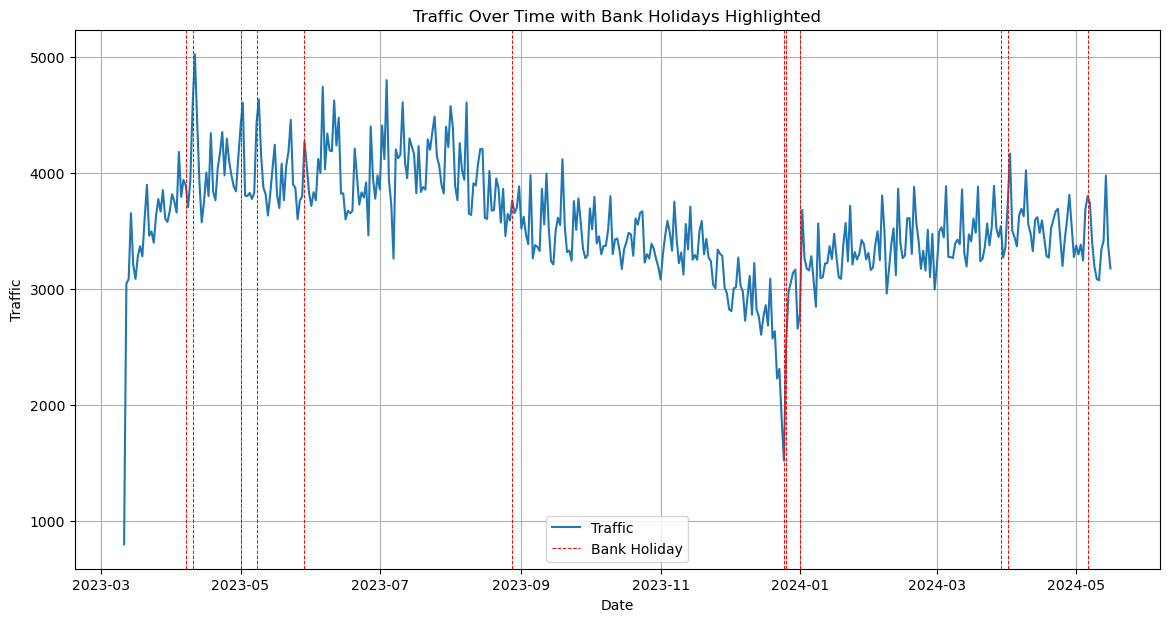

In [219]:
# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic')

# Highlight bank holidays
for holiday in bh_fad['date']:
    plt.axvline(x=holiday, color='r', linestyle='--', linewidth=0.7, label='Bank Holiday' if holiday == bh_fad['date'][0] else "")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('Traffic Over Time with Bank Holidays Highlighted')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


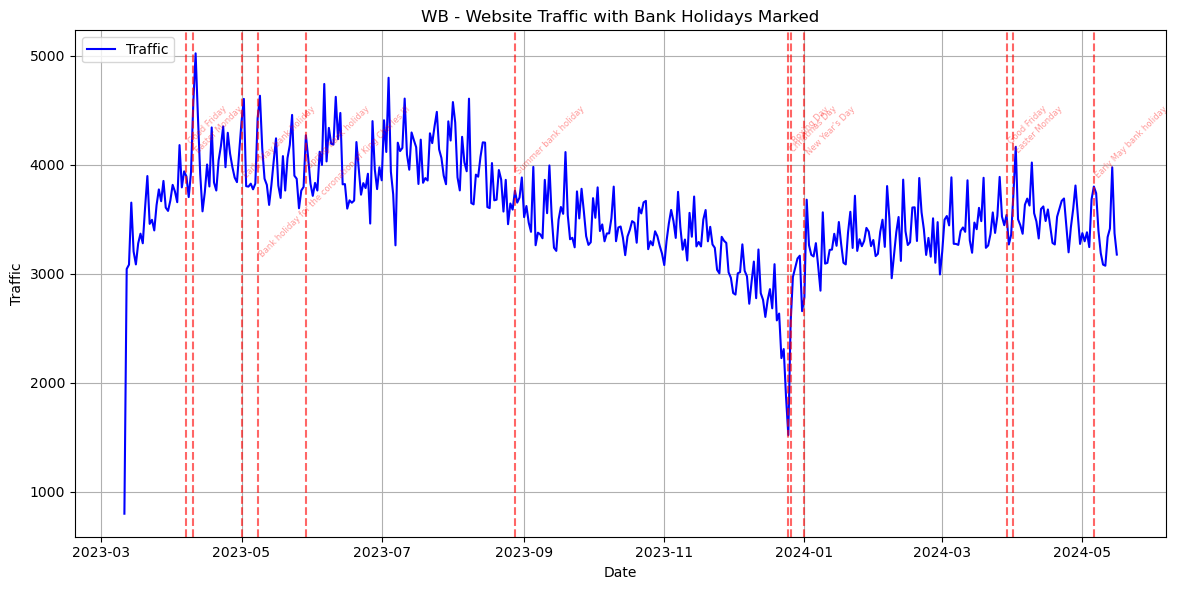

In [220]:
plt.figure(figsize=(12, 6))
plt.plot(df_fad['Date'], df_fad['traffic'], label='Traffic', color='blue')

# Add vertical lines and annotations for holidays
for idx, row in bh_fad.iterrows():
    holiday_date = row['date']
    holiday_name = row['title']
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.6)
    plt.text(holiday_date, df_fad['traffic'].max() * 0.9, holiday_name, alpha=0.4,
             rotation=45, verticalalignment='center_baseline', color='red', fontsize=6)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.title('WB - Website Traffic with Bank Holidays Marked')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("WB",pad_inches=0.3)

# Show the plot
plt.show()

In [221]:
df_fad['Date'] = pd.to_datetime(df_fad['Date'])
bh_fad['date'] = pd.to_datetime(bh_fad['date'])

In [222]:
non_holiday_traffic = df_fad[~df_fad['Date'].isin(bh_fad['date'])]['traffic']
average_traffic = non_holiday_traffic.mean()

In [223]:
non_holiday_traffic.head()

1    3176.0
2    3372.0
3    3977.0
4    3415.0
5    3337.0
Name: traffic, dtype: float64

In [224]:
average_traffic

3571.973871733967

In [225]:
# Define a function to determine the drop period around a holiday
def find_traffic_drop_period(holiday_date, traffic_data, threshold=0.6):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a drop threshold as 80% of the average traffic
    drop_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    drop_days_before = 0
    drop_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] < drop_threshold:
        drop_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return drop_days_before + 1 + drop_days_after  # +1 to include the holiday itself

In [226]:
# Calculate the number of drop days for each holiday
bh_fad['drop_days'] = bh_fad['date'].apply(lambda x: find_traffic_drop_period(x, df_fad))

# Print the results
print(bh_fad[['date', 'title', 'drop_days']])

         date                                              title  drop_days
0  2023-04-07                                        Good Friday          1
1  2023-04-10                                      Easter Monday          1
2  2023-05-01                             Early May bank holiday          1
3  2023-05-08  Bank holiday for the coronation of King Charle...          1
4  2023-05-29                                Spring bank holiday          1
5  2023-08-28                                Summer bank holiday          1
6  2023-12-25                                      Christmas Day          2
7  2023-12-26                                         Boxing Day          3
8  2024-01-01                                     New Year’s Day          1
9  2024-03-29                                        Good Friday          1
10 2024-04-01                                      Easter Monday          1
11 2024-05-06                             Early May bank holiday          1


In [62]:
def find_traffic_spike_period(holiday_date, traffic_data, threshold=1.2):
    # Get traffic data around the holiday
    holiday_traffic = traffic_data.set_index('Date').loc[holiday_date]

    # Define a spike threshold as 120% of the average traffic
    spike_threshold = average_traffic * threshold

    # Initialize counters for days before and after the holiday
    spike_days_before = 0
    spike_days_after = 0

    # Check days before the holiday
    date_cursor = holiday_date - pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_before += 1
        date_cursor -= pd.Timedelta(days=1)
    
    # Check days after the holiday
    date_cursor = holiday_date + pd.Timedelta(days=1)
    while date_cursor in traffic_data['Date'].values and traffic_data.set_index('Date').loc[date_cursor, 'traffic'] > spike_threshold:
        spike_days_after += 1
        date_cursor += pd.Timedelta(days=1)
    
    return spike_days_before + 1 + spike_days_after  # +1 to include the holiday itself

In [227]:
# Calculate the number of spike days for each holiday
bh_fad['spike_days'] = bh_fad['date'].apply(lambda x: find_traffic_spike_period(x, df_fad))

In [228]:
print(bh_fad[['date', 'title', 'spike_days']])

         date                                              title  spike_days
0  2023-04-07                                        Good Friday           1
1  2023-04-10                                      Easter Monday           3
2  2023-05-01                             Early May bank holiday           2
3  2023-05-08  Bank holiday for the coronation of King Charle...           2
4  2023-05-29                                Spring bank holiday           1
5  2023-08-28                                Summer bank holiday           1
6  2023-12-25                                      Christmas Day           1
7  2023-12-26                                         Boxing Day           1
8  2024-01-01                                     New Year’s Day           1
9  2024-03-29                                        Good Friday           1
10 2024-04-01                                      Easter Monday           1
11 2024-05-06                             Early May bank holiday           1